# Lab 1.1 - Cleaning and Analyzing Warehouse Data

## Objective
1. Import a CSV dataset using `pandas`
2. Clean the dataset using multiple techniques
3. Answer questions about using the data. 

*Use the challenge dataset to practice cleaning with regex.*

## Rubric

- 6 pts - Contains all required components and uses professional language
- 5 pts - Contains all required components, but uses unprofessional language, formating, etc. 
- 4 pts - Contains some, but not all, of the required components
- 3 pts - Did not submit

## Pandas reference

In addtion to the methods you learned last lab, you may need the following: 

- `df.dtypes` - the data types of the each column
- `df.columns` - the name of each column
- `df.shape` - the number of rows and columns of the dataset
- `df.dropna()` - removes null values
- `df.isnull()` - returns a dataframe with true/false values based on if the value is null. Can be used in conjuction with `.sum()`
- `pd.todatetime(...)` - sets a given column to a `datetime` object
- `df.column.isunique` - returns True if all data are unique
- `df.column.unique()` - returns all of the uniue values of a column
- `df['col'].replace(...,...)` - replaces values in a column with another value
- `df['col'].value_counts()` - returns the value counts of each unique value
- `df['col'].quantile(0.25)` or `.quartile(0.75) ` - returns the value at 25% or 75% precent    

## Preparing Data

In this section, we will import and prepare our data to be manipulated

Import `pandas` and `matplotlib.pyplot` here.

In [2]:
import pandas as pd 
import matplotlib.pyplot

Use `pandas`' `read_csv()` to create a Dataframe called `warehouse`.

In [3]:
warehouse = pd.read_csv("warehouse_data.csv")

Display the first 5 rows of `warehouse`.

In [4]:
warehouse.head(5)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True


Display the column names of the Dataframe. 

In [5]:
warehouse = pd.read_csv("warehouse_data.csv")
warehouse.columns.to_list()

['order_id',
 'customer_id',
 'date',
 'nearest_warehouse',
 'shopping_cart',
 'order_price',
 'delivery_charges',
 'customer_lat',
 'customer_long',
 'coupon_discount',
 'order_total',
 'season',
 'is_expedited_delivery',
 'distance_to_nearest_warehouse',
 'latest_customer_review',
 'is_happy_customer']

How many data points are in our table?

In [6]:
warehouse.columns.unique()

Index(['order_id', 'customer_id', 'date', 'nearest_warehouse', 'shopping_cart',
       'order_price', 'delivery_charges', 'customer_lat', 'customer_long',
       'coupon_discount', 'order_total', 'season', 'is_expedited_delivery',
       'distance_to_nearest_warehouse', 'latest_customer_review',
       'is_happy_customer'],
      dtype='object')

We can use one command to answer these three questions: 
- What is the average coupon discount?
- What is the largest order price?
- What is the smallest distance to warehouse?

In [7]:
print("Coupon Discount mean: " + str(warehouse["coupon_discount"].mean()))
print("Largest Order Price: " + str(warehouse["order_price"].max()))
print("Smallest Distance to Warehouse: " + str(warehouse["distance_to_nearest_warehouse"].min()))

Coupon Discount mean: 10.89
Largest Order Price: 947691
Smallest Distance to Warehouse: 0.1078


## Cleaning Data

**Data cleaning** is the process of removing errors and inaccuracies from data to make it ready for analysis In these next steps, we will explore and clean our dataset. 


Check the dataset for null(or empty) values. How many null values are there and in which columns?

In [8]:
print("Null values: " + str(warehouse.isnull().sum()))

Null values: order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           8
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           1
is_happy_customer                0
dtype: int64


So `season` and `latest_customer_review` have missing values. Fill the drop the rows with missing values. You should have 491 rows remaining.

In [9]:
warehouse.dropna()



,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD475510,ID0247417082,2019-08-07,Nickolson,"[('Alcon 10', 2), ('iAssist Line', 2)]",386776,59.70,-37.817662,144.970405,10,20174.70,Winter,True,0.1282,i bought this phone to send to my sister in .....,False
496,ORD086060,ID0130015098,2019-03-28,Nickolson,"[('pearTV', 2), ('Candle Inferno', 2), ('Toshi...",22120,62.29,-37.815469,144.968083,0,22182.29,Autumn,True,0.3711,one star it was the wrong phone,False
497,ORD079320,ID2707985442,2019-10-16,Nickolson,"[('pearTV', 1), ('Alcon 10', 1), ('Lucent 330S...",16490,106.98,-37.805979,144.966101,0,16596.98,Spring,True,1.4368,love this phone! has many great features!,True
498,ORD026546,ID0060088412,2019-05-19,Nickolson,"[('iStream', 1), ('Candle Inferno', 1), ('iAss...",5030,79.89,37.820071,144.984435,10,4606.89,Autumn,True,1.3191,spoiled son's birthday present son wanted one ...,True


Now let's take a look at the data types of each column and see if they make sense.

In [10]:
warehouse.dtypes

order_id                          object
customer_id                       object
date                              object
nearest_warehouse                 object
shopping_cart                     object
order_price                        int64
delivery_charges                 float64
customer_lat                     float64
customer_long                    float64
coupon_discount                    int64
order_total                      float64
season                            object
is_expedited_delivery               bool
distance_to_nearest_warehouse    float64
latest_customer_review            object
is_happy_customer                   bool
dtype: object

Data type of date column is object instead of datetime. So fix this problem and check the datatypes again.

In [11]:
warehouse["date"].replace()

/tmp/ipykernel_8211/985991126.py:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  warehouse["date"].replace()


0      2019-06-22
1      2019-12-29
2      2019-03-02
3      2019-01-12
4      2019-11-28
          ...    
495    2019-08-07
496    2019-03-28
497    2019-10-16
498    2019-05-19
499    2019-05-25
Name: date, Length: 500, dtype: object

In [12]:
warehouse.dtypes

order_id                          object
customer_id                       object
date                              object
nearest_warehouse                 object
shopping_cart                     object
order_price                        int64
delivery_charges                 float64
customer_lat                     float64
customer_long                    float64
coupon_discount                    int64
order_total                      float64
season                            object
is_expedited_delivery               bool
distance_to_nearest_warehouse    float64
latest_customer_review            object
is_happy_customer                   bool
dtype: object

Now let's check for errors. 

First, let's make sure that our data in `order_id` is unique and we don't have any duplicates. 

In [13]:
warehouse.order_id.duplicated

<bound method Series.duplicated of 0      ORD182494
1      ORD395518
2      ORD494479
3      ORD019224
4      ORD104032
         ...    
495    ORD475510
496    ORD086060
497    ORD079320
498    ORD026546
499    ORD085447
Name: order_id, Length: 500, dtype: object>

Now, let's check what the unique values of `nearest_warehouse` are.

In [14]:
warehouse["nearest_warehouse"].unique()

array(['Thompson', 'Nickolson', 'Bakers', 'nickolson', 'thompson'],
      dtype=object)

Thompson and thompson should be the same, but here they are being counted as different warehouse. Similarly Nickolson and nickolson are same. Change all of the lowercase names to Title case. 

In [15]:
warehouse["nearest_warehouse"].str.lower().unique()

array(['thompson', 'nickolson', 'bakers'], dtype=object)

Check the quantities of each `nearest_warehouse`.

In [16]:
warehouse["nearest_warehouse"] = warehouse["nearest_warehouse"].str.lower()
warehouse["nearest_warehouse"].value_counts()

nearest_warehouse
thompson     197
nickolson    184
bakers       119
Name: count, dtype: int64

The value counts should be Thompson: 192, Nickolson: 183, Bakers: 116

Check the counts and unique values of `is_happy_customer`.

In [17]:
warehouse["is_happy_customer"].value_counts().unique()
print("[Happy Other] -> " + str(warehouse["is_happy_customer"].value_counts().unique()))

[Happy Other] -> [359 141]


Create a table with `order_price`, `delivery_charges`, `coupon_discount`, and `order_total`. Look at the first 10 rows. Is the `order_total` column correct?

In [18]:

warehouse["order_total"] = warehouse["order_price"] + warehouse["delivery_charges"] + warehouse["coupon_discount"]
pd.DataFrame(warehouse["order_total"])
#pd.DataFrame(warehouse)

,order_total
0,12289.89
1,9142.71
2,10745.87
3,24872.61
4,9245.54
...,...
495,386845.70
496,22182.29
497,16596.98
498,5119.89


### Remove Outliers

We are going to remove statistical outliers in `order_total`. To remove outliers, follow this process:

- Find upper and lower quartiles
- Find IQR range
- Find upper and lower limit
- Remove elements 

In [19]:
warehouse["order_total"].quantile(0.25)

7141.645

In [20]:
warehouse["order_total"].quantile(0.75)

20441.245

In [21]:
iqr = warehouse["order_total"].quantile(0.75) - warehouse["order_total"].quantile(0.25) 
print(iqr)

13299.599999999999


In [22]:
q1 = warehouse["order_total"].quantile(0.25)
q3 = warehouse["order_total"].quantile(0.75)

lw = q1 - (1.5 * iqr)
up = q3 + (1.5 * iqr)
print(lw)
print(up)

-12807.754999999997
40390.645


In [23]:

no_out = warehouse[(warehouse["order_total"] >= lw) & (warehouse["order_total"] <= up)]
print(no_out)





      order_id   customer_id        date nearest_warehouse  \
0    ORD182494  ID6197211592  2019-06-22          thompson   
1    ORD395518  ID0282825849  2019-12-29          thompson   
2    ORD494479  ID0579391891  2019-03-02         nickolson   
3    ORD019224  ID4544561904  2019-01-12         nickolson   
4    ORD104032  ID6231506320  2019-11-28         nickolson   
..         ...           ...         ...               ...   
494  ORD379700  ID2190564628  2019-08-05         nickolson   
496  ORD086060  ID0130015098  2019-03-28         nickolson   
497  ORD079320  ID2707985442  2019-10-16         nickolson   
498  ORD026546  ID0060088412  2019-05-19         nickolson   
499  ORD085447  ID5257193650  2019-05-25            bakers   

                                         shopping_cart  order_price  \
0    [('Lucent 330S', 1), ('Thunder line', 2), ('iS...        12200   
1          [('Thunder line', 1), ('Universe Note', 2)]         9080   
2                 [('Thunder line', 1), ('

There are 18 records with outliers to remove. 

## Explore Data

Now that our data is clean, we can answer questions about it!

What is the largest order?

In [24]:
warehouse["order_total"].max()

947791.82

What is the smallest order?

In [25]:
warehouse["order_total"].min()

701.79

Without outliers, what are the top 5 most expensive orders?

In [26]:
no_out.nlargest(5, "order_total")

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
390,ORD242864,ID3281126642,2019-04-29,thompson,"[('Universe Note', 2), ('iStream', 1), ('Alcon...",37570,79.94,-37.804870,144.961308,0,37649.94,Autumn,True,1.5240,nice little tablet. functional and easy to use...,True
61,ORD028755,ID0283255338,2019-06-13,bakers,"[('iAssist Line', 2), ('pearTV', 2), ('Thunder...",37150,65.32,-37.803982,145.007587,0,37215.32,Winter,True,1.2762,i order google pixel 2xl and it's come google ...,False
78,ORD347594,ID0332796790,2019-04-01,bakers,"[('Lucent 330S', 2), ('pearTV', 2), ('iAssist ...",35205,73.58,-37.808563,145.000167,10,35288.58,Summer,True,0.4624,not as advertised was not actually unlocked an...,False
454,ORD326400,ID4516157159,2019-12-15,thompson,"[('Alcon 10', 2), ('pearTV', 2), ('Thunder lin...",35180,74.12,-37.820657,144.941196,15,35269.12,Spring,False,1.0279,"perfecto lo unico malo q demora en llegar, hay...",True
380,ORD241112,ID3924911400,2019-01-22,nickolson,"[('Alcon 10', 2), ('Universe Note', 1), ('pear...",34400,93.70,-37.812620,144.965171,10,34503.70,Summer,True,0.7686,very happy,True


What warehouse is the closest to most customers? Create a visualization.

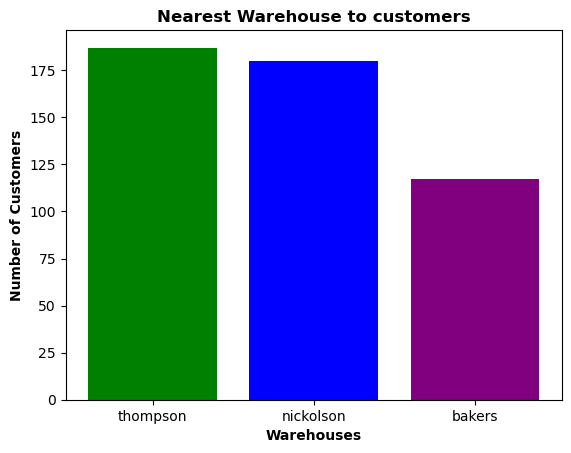

In [41]:
import matplotlib.pyplot as plt

warehouse_counts = no_out["nearest_warehouse"].value_counts()
y = warehouse_counts.values
x = no_out.nearest_warehouse.unique()
colors = ["green", "blue", "purple"]
plt.bar(x, y, color=colors[:len(x)])
plt.xlabel("Warehouses", fontweight="bold")
plt.ylabel("Number of Customers", fontweight="bold")
plt.title("Nearest Warehouse to customers", fontweight="bold")
plt.show()



What percentage of customers are satisfied with their purchase? Create a visualization.

[0.7128099173553719, 0.2871900826446281]


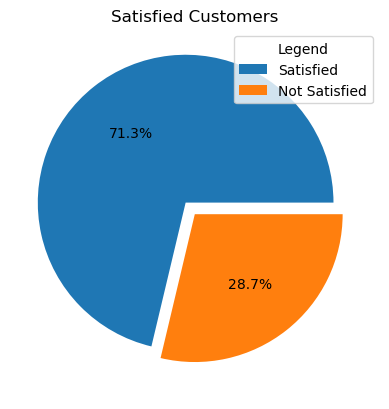

In [39]:
labels = ["Satisfied", "Not Satisfied"]
tru = (no_out["is_happy_customer"] == True).sum() / len(no_out)
fal = (no_out["is_happy_customer"] == False).sum() / len(no_out)
x = [tru, fal]
print(x)
e = (0.1, 0)
plt.pie(x, explode = e, autopct= "%1.1f%%")
plt.title("Satisfied Customers")
plt.legend(labels, title = "Legend", loc="upper right", fontsize = 10)
plt.show()
